In [1]:
import tensorflow as tf
from tensorflow import keras

#Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.10.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

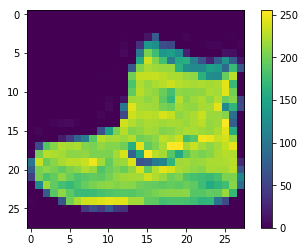

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

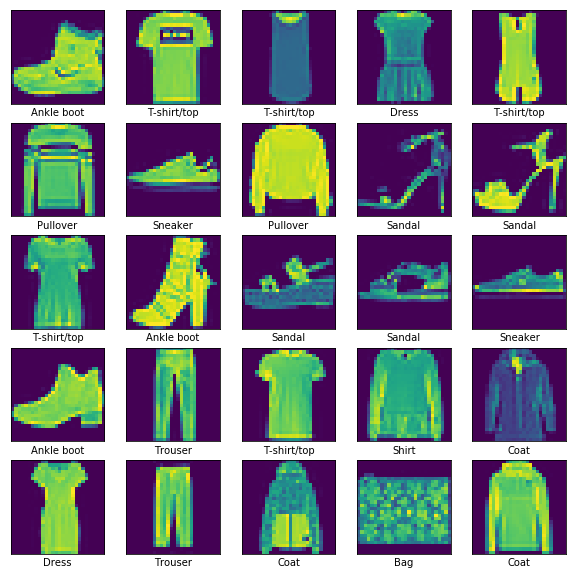

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i]) #, cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [16]:
model.compile(optimizer=tf.train.AdamOptimizer(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 64us/step - loss: 0.5039 - acc: 0.8220
Epoch 2/5
60000/60000 [==============================] - 3s 47us/step - loss: 0.3798 - acc: 0.8624
Epoch 3/5
60000/60000 [==============================] - 4s 60us/step - loss: 0.3392 - acc: 0.8748
Epoch 4/5
60000/60000 [==============================] - 4s 61us/step - loss: 0.3121 - acc: 0.8854
Epoch 5/5
60000/60000 [==============================] - 3s 57us/step - loss: 0.2955 - acc: 0.8919


In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 23us/step
Test accuracy: 0.8804


In [35]:
predictions = model.predict(test_images)

In [36]:
predictions[0]

array([2.9064186e-05, 1.0241657e-07, 2.0385235e-06, 2.8642430e-06,
       2.1270637e-06, 4.7505093e-03, 2.2086462e-05, 2.2449017e-01,
       2.6849785e-04, 7.7043253e-01], dtype=float32)

In [37]:
np.argmax(predictions[0])

9

In [38]:
class_names[9]

'Ankle boot'

In [39]:
test_labels[0]

9

In [40]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

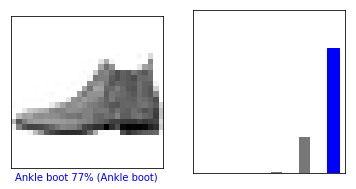

In [41]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

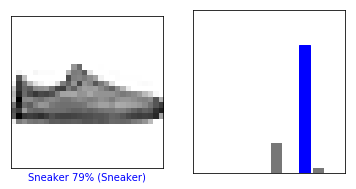

In [42]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

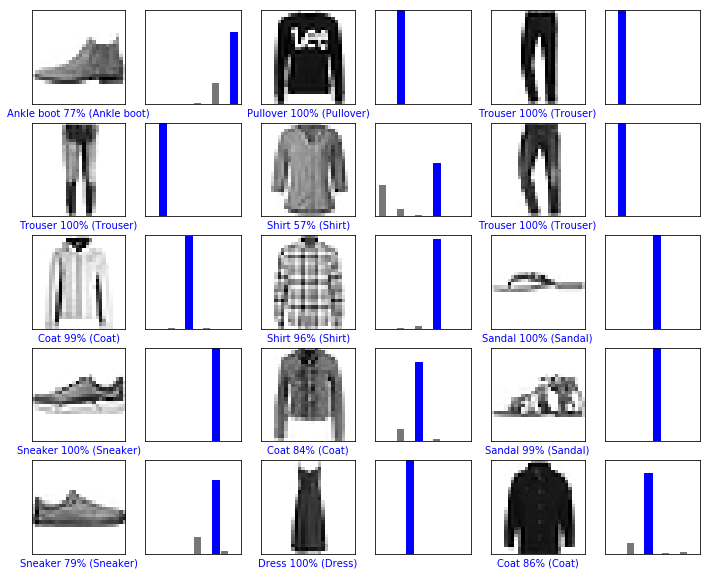

In [43]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [44]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [45]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [46]:
predictions_single = model.predict(img)

print(predictions_single)

[[2.9064267e-05 1.0241657e-07 2.0385273e-06 2.8642457e-06 2.1270716e-06
  4.7505070e-03 2.2086462e-05 2.2449017e-01 2.6849809e-04 7.7043253e-01]]


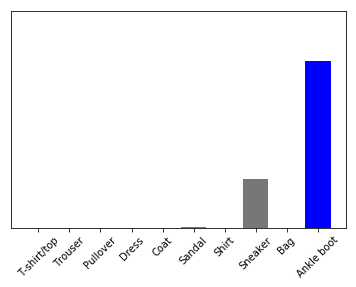

In [47]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [48]:
np.argmax(predictions_single[0])

9

In [1]:
import tensorflow as tf
import multiprocessing
import numpy as np

def run_tensorflow():

    n_input = 10000
    n_classes = 1000

    # Create model
    def multilayer_perceptron(x, weight):
        # Hidden layer with RELU activation
        layer_1 = tf.matmul(x, weight)
        return layer_1

    # Store layers weight & bias
    weights = tf.Variable(tf.random_normal([n_input, n_classes]))


    x = tf.placeholder("float", [None, n_input])
    y = tf.placeholder("float", [None, n_classes])
    pred = multilayer_perceptron(x, weights)

    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
    optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

    init = tf.global_variables_initializer()

    with tf.Session() as sess:
        sess.run(init)

        for i in range(100):
            batch_x = np.random.rand(10, 10000)
            batch_y = np.random.rand(10, 1000)
            sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})

    print("finished doing stuff with tensorflow!")





C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [5]:
# option 1: execute code with extra process
p = multiprocessing.Process(target=run_tensorflow)
p.start()
p.join()
print("finished")
# wait until user presses enter key
# raw_input()

# # option 2: just execute the function
# run_tensorflow()

# # wait until user presses enter key
# raw_input()

finished
